In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
import pandas as pd

df = pd.read_csv(r"C:\Users\112ra\sales.csv.csv")

print(df.shape)
print(df.columns)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\112ra\\sales.csv.csv'

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True, errors="coerce")
df["ship_date"] = pd.to_datetime(df["ship_date"], dayfirst=True, errors="coerce")



In [ ]:
df["sales"] = (
    df["sales"]
    .astype(str)                      
    .str.replace(",", "", regex=True)  
)
df["sales"] = df["sales"].astype(float)



In [ ]:
df = df[df["sales"] > 0]
print((df["sales"] == 0).sum())


0


In [ ]:
total_sales = df["sales"].sum()
print("Total Sales:", total_sales)

Total Sales: 12642905.0


In [ ]:
total_profit = df["profit"].sum()
print("Total Profit:", total_profit)

Total Profit: 1469035.9312800001


In [ ]:
df["year_month"] = df["order_date"].dt.to_period("M")

In [ ]:
monthly_sales = df.groupby("year_month")["sales"].sum()
print(monthly_sales.head())

year_month
2011-01    42830.0
2011-02    35752.0
2011-03    54548.0
2011-04    52219.0
2011-05    54681.0
Freq: M, Name: sales, dtype: float64


In [ ]:
print(df["order_date"].dtype)
print(df["order_date"].head())

datetime64[ns]
0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: order_date, dtype: datetime64[ns]


In [ ]:
top_products=(df.groupby("product_name")["sales"].sum().sort_values(ascending=False).head(5))
print(top_products.head(5))

product_name
Apple Smart Phone, Full Size             86936.0
Cisco Smart Phone, Full Size             76441.0
Motorola Smart Phone, Full Size          73159.0
Nokia Smart Phone, Full Size             71904.0
Canon imageCLASS 2200 Advanced Copier    61600.0
Name: sales, dtype: float64


In [ ]:
monthly_sales = df.groupby("year_month")["sales"].sum()
print(monthly_sales.head(5))

year_month
2011-01    42830.0
2011-02    35752.0
2011-03    54548.0
2011-04    52219.0
2011-05    54681.0
Freq: M, Name: sales, dtype: float64


In [ ]:
category_summary = df.groupby("category")[["sales", "profit"]].sum()
category_summary.sort_values("sales", ascending=False)
print(category_summary)

                     sales        profit
category                                
Furniture        4110884.0  286782.25380
Office Supplies  3787330.0  518474.94430
Technology       4744691.0  663778.73318


In [ ]:
subcat_sales = (
    df.groupby("sub_category")["sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(subcat_sales)


sub_category
Phones         1706874.0
Copiers        1509439.0
Chairs         1501682.0
Bookcases      1466559.0
Storage        1127124.0
Appliances     1011081.0
Machines        779071.0
Tables          757034.0
Accessories     749307.0
Binders         461952.0
Name: sales, dtype: float64


In [ ]:
region_sales = df.groupby("region")["sales"].sum().sort_values(ascending=False)
print(region_sales)               


region
Central           2822399.0
South             1600960.0
North             1248192.0
Oceania           1100207.0
Southeast Asia     884438.0
North Asia         848349.0
EMEA               806184.0
Africa             783776.0
Central Asia       752839.0
West               725514.0
East               678834.0
Caribbean          324281.0
Canada              66932.0
Name: sales, dtype: float64


In [ ]:
top_customers = (
    df.groupby("customer_name")["sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_customers.head(3))


customer_name
Tom Ashbrook    40489.0
Tamara Chand    37453.0
Greg Tran       35552.0
Name: sales, dtype: float64


In [ ]:
df["sales"] = df["sales"].astype(float)

In [ ]:
df["profit_margin"] = (df["profit"] / df["sales"]) * 100
margin_by_category = df.groupby("category")["profit_margin"].mean()
print(margin_by_category)


category
Furniture          0.874818
Office Supplies    5.855933
Technology         4.965838
Name: profit_margin, dtype: float64


In [ ]:
margin_by_category = (
    df.groupby("category")[["sales", "profit"]]
    .sum()
)

margin_by_category["profit_margin_%"] = (
    margin_by_category["profit"] / margin_by_category["sales"]
) * 100

print(margin_by_category)


                     sales        profit  profit_margin_%
category                                                 
Furniture        4110884.0  286782.25380         6.976170
Office Supplies  3787330.0  518474.94430        13.689722
Technology       4744691.0  663778.73318        13.989925


In [ ]:
top_profit_subcats = (
    df.groupby("sub_category")["profit"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print(top_profit_subcats)


sub_category
Copiers       258567.54818
Phones        216717.00580
Bookcases     161924.41950
Chairs        141973.79750
Appliances    141681.69940
Name: profit, dtype: float64


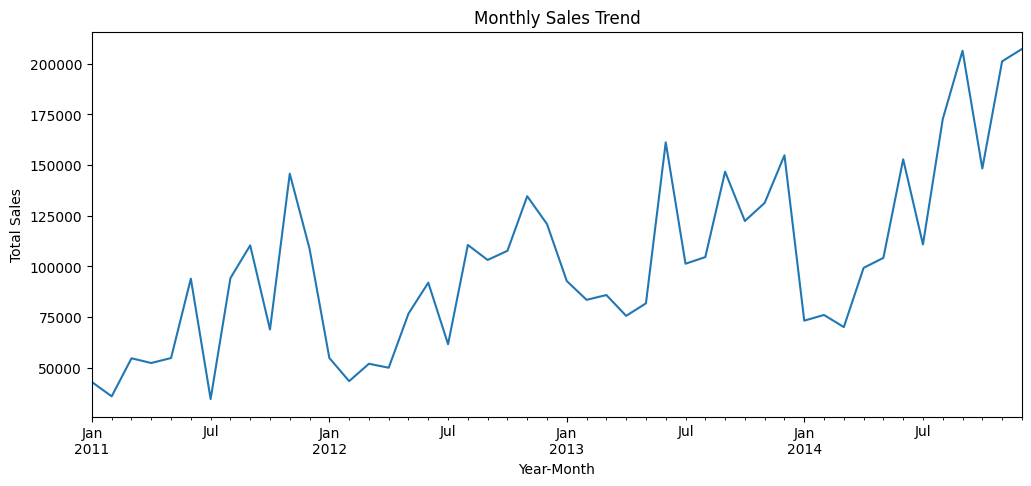

In [ ]:
plt.figure(figsize=(12,5))
monthly_sales.plot()

plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")

plt.savefig(r"C:\Users\112ra\OneDrive\Desktop\visuals\monthly_sales_trend.png")

plt.show()

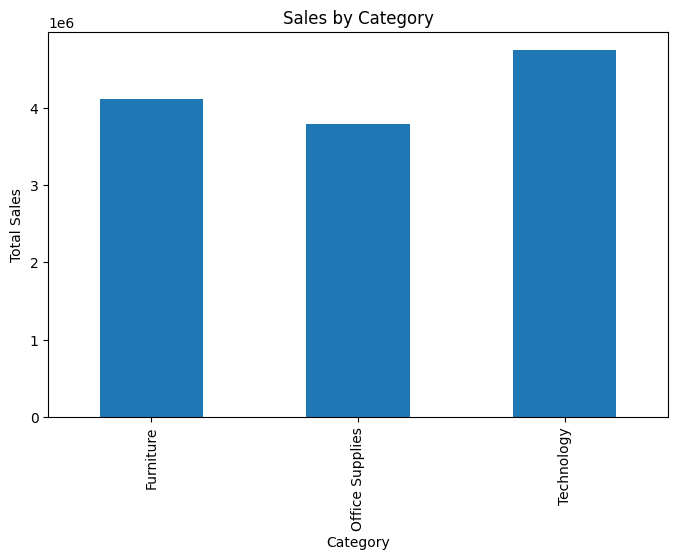

In [ ]:
plt.figure(figsize=(8,5))

category_summary["sales"].plot(kind="bar")

plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")

plt.savefig(r"C:\Users\112ra\OneDrive\Desktop\visuals\sales_by_category.png")
plt.show()


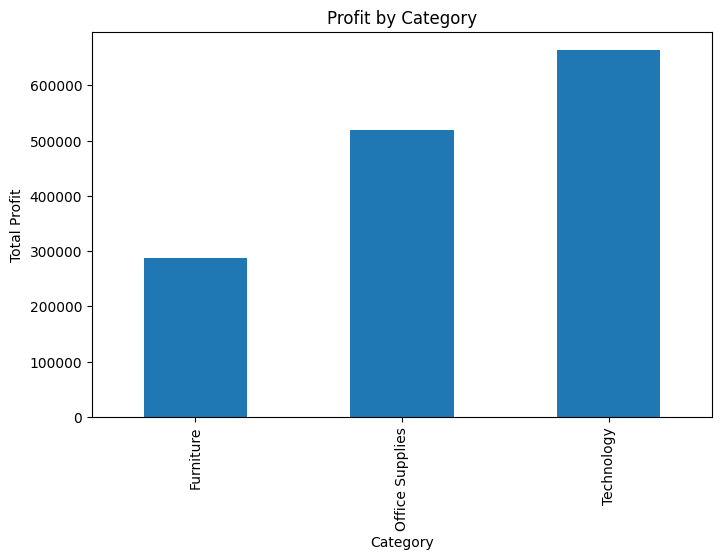

In [ ]:
plt.figure(figsize=(8,5))

category_summary["profit"].plot(kind="bar")

plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")

plt.savefig(r"C:\Users\112ra\OneDrive\Desktop\visuals\profit_by_category.png")
plt.show()

<Figure size 800x500 with 0 Axes>

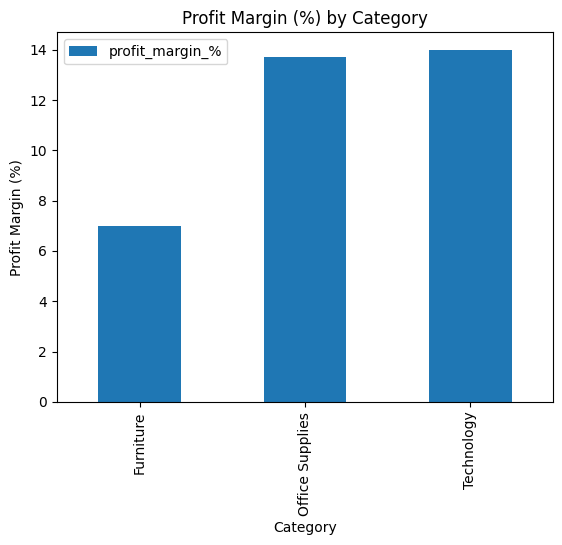

In [ ]:
plt.figure(figsize=(8,5))

margin_by_category.plot(kind="bar", y="profit_margin_%")

plt.title("Profit Margin (%) by Category")
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")

plt.savefig(r"C:\Users\112ra\OneDrive\Desktop\visuals\profit_margin_by_category.png")
plt.show()


                         Business Insights


1. Furniture has high sales volume, but Technology and Office Supplies deliver higher profit margins (~14%), making them more efficient categories for profitability.

2. Copiers are the most profitable sub-category, followed by Phones, highlighting Technology products as key drivers of business profit.

3. Phones contribute the highest sales among all sub-categories.

4. Central region generates the maximum revenue.

5. Total profit is positive (~1.46M), indicating healthy business.

6. Technology products dominate top-selling items.

7. A small number of customers contribute disproportionately to revenue.